#  Sai Chaitanya

# The Sparks Foundation 

# Task 1

#  Prediction using supervised machine learning 

# Study performace data

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

#### Importing Data From Source

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data Imported')

Data Imported


#### Data Observation

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Maximun and Minimum Observations of Data

In [8]:
print(data['Hours'].max())
print(data['Scores'].max())

9.2
95


In [9]:
print(data['Hours'].min())
print(data['Scores'].min())

1.1
17


### Visualizing Data

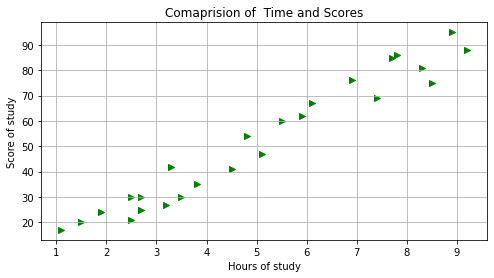

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(data['Hours'],data['Scores'],color = 'green',marker = '>')
plt.xlabel('Hours of study')
plt.ylabel('Score of study')
plt.title('Comaprision of  Time and Scores')
plt.grid()
plt.show()

### Data Point where score of study is less but higher time spent.

In [11]:
# here if we see there is less score of study but higher time spent
data[(data['Hours'] > 8) & (data['Scores'] < 80)]

,Hours,Scores
3,8.5,75


#### Train_Test_Split of Data using sklearn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = data['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [14]:
x = data['Hours'].values.reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 10,test_size = 0.2)

 Importing LinearRegression From linear_model

In [16]:
from sklearn.linear_model import LinearRegression

#### Prediction and Visualization For Trained Data

In [17]:
train_reg = LinearRegression()

In [18]:
train_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
print(train_reg.coef_)
print(train_reg.intercept_)

[9.81430544]
2.6499651894038863


In [20]:
train_pred = train_reg.predict(x_train)

In [21]:
train_pred

array([75.27582547, 13.44570118, 56.62864513, 60.5543673 , 39.94432587,
       86.07156145, 70.36867275, 92.94157527, 62.51722839, 78.2201171 ,
       49.75863132, 79.20154764, 84.10870037, 29.14858989, 27.1857288 ,
       21.29714553, 27.1857288 , 89.99728363, 37.00003424, 29.14858989])

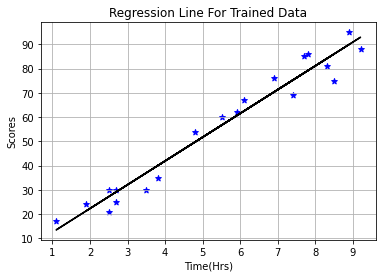

In [22]:
plt.scatter(x_train,y_train,color= 'b',marker = '*')
plt.plot(x_train,train_pred,color='black')
plt.xlabel('Time(Hrs)')
plt.ylabel('Scores',)
plt.title('Regression Line For Trained Data')
plt.grid()
plt.show()

#### R-Squared value for Acuuracy of Learning to the Machine (For Trained Data)

In [23]:
Train_R_Squared_value = train_reg.score(x_train,y_train)
Train_R_Squared_value

0.95807022445042

#### Regression Prediction and Visualization For Tested Data

In [24]:
test_reg = LinearRegression()

In [25]:
test_reg.fit(x_test,y_test)

LinearRegression()

In [26]:
test_pred = test_reg.predict(x_test)

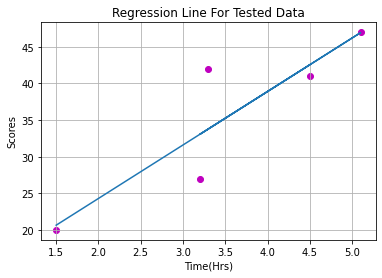

In [27]:
plt.scatter(x_test,y_test,color= 'm',marker = 'o')
plt.plot(x_test,test_pred)
plt.xlabel('Time(Hrs)')
plt.ylabel('Scores',)
plt.title('Regression Line For Tested Data')
plt.grid()
plt.show()

#### Actual vs Predicted Data

In [28]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': train_pred})  
df 

,Actual,Predicted
0,69,75.275825
1,17,13.445701
2,60,56.628645
3,62,60.554367
4,35,39.944326
5,75,86.071561
6,76,70.368673
7,88,92.941575
8,67,62.517228
9,85,78.220117


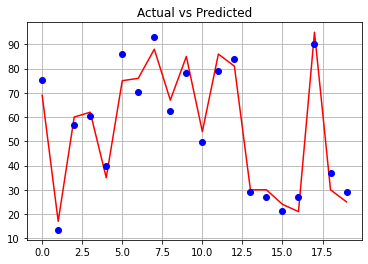

In [29]:
plt.plot(df['Actual'],'r')
plt.plot(df['Predicted'],'bo')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

#### R-Squared value for Acuuracy of Learning to the Machine (For Tested Data)

For only 20% data the score is 79% 

In [30]:
# This represents very strong relation of data
Test_R_Squared_value = test_reg.score(x_test,y_test)
Test_R_Squared_value

0.793199272799264

### Regression For Original Data

In [31]:
# regression for normal data
o_reg = LinearRegression()

In [32]:
o_reg.fit(x,y)

LinearRegression()

In [33]:
o_pred = o_reg.predict(x)
o_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

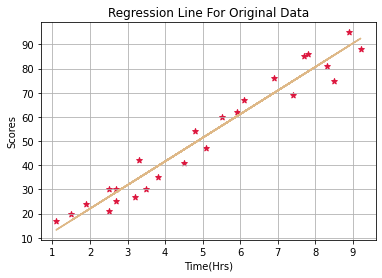

In [34]:
plt.scatter(x,y,color= 'crimson',marker = '*')
plt.plot(x,o_pred,color='burlywood')
plt.xlabel('Time(Hrs)')
plt.ylabel('Scores',)
plt.title('Regression Line For Original Data')
plt.grid()
plt.show()

In [35]:
o_R_squared_value = o_reg.score(x,y)
o_R_squared_value

0.9529481969048356

### What will be predicted score if a student studies for 9.25 hrs/ day?

#### Y = B0 + B1*X formula for predicting for the value

In [36]:
p_score = o_reg.predict([[9.25]])

In [37]:
p_score

array([92.90985477])